## CNN

### Convolutionl Layerのスクラッチ実装

In [ ]:
# ライブラリ
import time

import torch
import torchvision
import numpy
from torchvision import transforms
from torch import optim
import matplotlib.pyplot as plt
import pandas as pd
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader


%load_ext autoreload
%autoreload 2
import utils

: 

In [2]:
dataset = torchvision.datasets.MNIST(root='./mnist_data/', train=True, download=True)
im, label = dataset[0]
# PIL -> tensor
# 白黒なので2rankにする
im = transforms.ToTensor()(im)[0, :, :]


In [3]:
# 白黒なので2rankにする
im.shape

torch.Size([28, 28])

TypeError: Invalid shape (28,) for image data

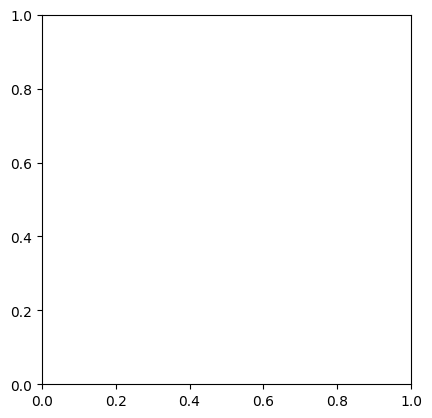

In [4]:
# たしかえmr
plt.imshow(im[0], cmap='gray')

In [48]:
# 画像の縦横
im_h, im_w = im.shape
# filterの縦横
f_h, f_w = top_edge_filter.shape
print(im_h, im_w)
print(f_h, f_w)


28 28
3 3


In [49]:
# upper edge fileter
top_edge_filter = torch.tensor([[-1, -1, -1], 
                                [0,0,0], 
                                [1,1,1]])


In [52]:
# filterを動かす -> for文 -> たてとよこ-> 2重ループ
# 行
output_data = []
for i in range(im_h - f_h + 1):
    # 横
    row = []
    for j in range(im_w - f_w + 1):
        # フィルターに適用する入力データを抽出して、フィルターと要素ごとの掛け算して総和
        row.append((im[i:i + f_h, j:j+f_w] * top_edge_filter).sum().item())
    output_data.append(row)

        

In [55]:
torch.tensor(output_data).shape

torch.Size([26, 26])

In [65]:
# 関数化
def apply_filter(im, filter):
    output_data = []
    for i in range(im_h - f_h + 1):
        row = []
        for j in range(im_w - f_w + 1):
            row.append((im[i:i+f_h, j:j+f_w] * filter).sum().item())
        output_data.append(row)

    return torch.tensor(output_data)

In [66]:
filtered_im = apply_filter(im, top_edge_filter)
filtered_im.shape

torch.Size([26, 26])

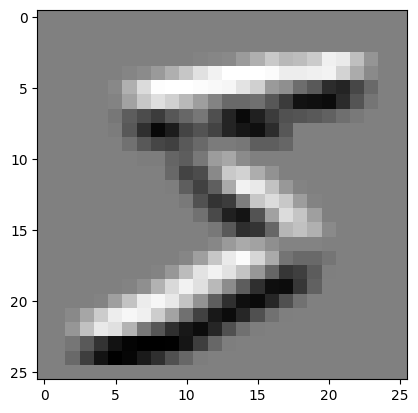

In [67]:
plt.imshow(filtered_im, cmap='gray')

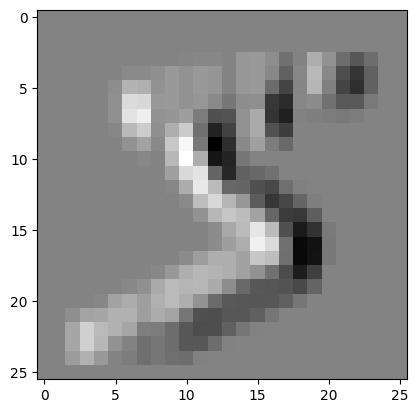

In [69]:
# left edge fillter
left_edge_fillter = torch.tensor([[-1,0,1],
                                  [-1, 0, 1], 
                                  [-1, 0, 1]])

filtered_im = apply_filter(im, left_edge_fillter)
plt.imshow(filtered_im, cmap='gray')

In [62]:
# それぞれのpixel値を表示する
df = pd.DataFrame(im)
df.style.format(precision=2).set_properties(**{'font-size':'7pt'}).background_gradient('Greys_r')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.07,0.07,0.07,0.49,0.53,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,0.37,0.60,0.67,0.99,0.99,0.99,0.99,0.99,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.98,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,0.99,0.99,0.99,0.99,0.78,0.71,0.97,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,0.42,0.99,0.99,0.80,0.04,0.00,0.17,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## CNN構築

In [14]:
conv_model = nn.Sequential(
    # 1x28x28 
    nn.Conv2d(1,4, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),

    # 4x14x14
    nn.Conv2d(4, 8, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),

    # 8x7x7
    nn.Conv2d(8,16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),

    # 16x4x4
    nn.Conv2d(16,32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    
    # """
    # 全結合層
    # # 32x2x2をフラット
    # nn.flatten()
    # # 128
    # nn.Linear(128, 10)
    # このようにやっても良いが、下のようにやるのがおすすめ
    # """

    nn.Conv2d(32, 10, kernel_size=3, stride=2, padding=1),
    # 10x1x1,
    nn.Flatten(),
    
)

In [15]:
conv_model

Sequential(
  (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
  (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (7): ReLU()
  (8): Conv2d(32, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (9): Flatten(start_dim=1, end_dim=-1)
)

In [16]:
X = torch.randn((8, 1, 28, 28))


In [19]:
output = conv_model(X)

In [21]:
output

tensor([[ 0.0527, -0.0520, -0.0517,  0.0500,  0.0655, -0.0306, -0.0050,  0.0380,
          0.0340, -0.0430],
        [ 0.0426, -0.0390, -0.0443,  0.0506,  0.0751, -0.0430, -0.0083,  0.0370,
          0.0258, -0.0456],
        [ 0.0371, -0.0492, -0.0446,  0.0460,  0.0690, -0.0251, -0.0062,  0.0307,
          0.0332, -0.0388],
        [ 0.0381, -0.0458, -0.0535,  0.0587,  0.0618, -0.0339, -0.0016,  0.0329,
          0.0306, -0.0422],
        [ 0.0265, -0.0512, -0.0422,  0.0511,  0.0714, -0.0284, -0.0010,  0.0300,
          0.0246, -0.0390],
        [ 0.0418, -0.0571, -0.0486,  0.0560,  0.0699, -0.0311,  0.0017,  0.0284,
          0.0401, -0.0378],
        [ 0.0400, -0.0546, -0.0456,  0.0446,  0.0620, -0.0257, -0.0081,  0.0393,
          0.0382, -0.0328],
        [ 0.0436, -0.0588, -0.0483,  0.0535,  0.0533, -0.0342,  0.0050,  0.0341,
          0.0391, -0.0370]], grad_fn=<ViewBackward0>)

In [29]:
# 合計パラメータ数
torch.tensor([param.numel() for param in conv_model.parameters()]).sum()
 

tensor(9034)

## MNISTでCNNを学習する

In [43]:
# データ準備

# PIL -> tensor, 正規化
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST('./mnist_data', train=True, download=True,transform=transform )
val_dataset = torchvision.datasets.MNIST('./mnist_data', train=False, download=True, transform=transform)

# dataloader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, num_workers=4)

X_train, y_train = next(iter(train_loader))
X_train.shape

torch.Size([128, 1, 28, 28])

In [66]:
# 学習する
# もしGPUで学習するなら, optmizerを作る前に
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
conv_model.to(device)

# optimizerを設定
opt = optim.SGD(conv_model.parameters(), lr=0.03)
# utils.learn()

In [67]:
start_time = time.time()
train_losses, val_losses, val_accuracy = utils.learn(conv_model,train_loader,val_loader, opt, loss_func=F.cross_entropy, num_epoch=5)
end_time = time.time()
print("かかった時間:",end_time - start_time) 

epoch: 0: train error: 0.1887958528501774, validation error: 0.18353628057137697, validation accuracy: 0.9439280063291139


epoch: 1: train error: 0.16489406625853417, validation error: 0.14659877623065928, validation accuracy: 0.9550039556962026


epoch: 2: train error: 0.14668674090269532, validation error: 0.15859644043058913, validation accuracy: 0.9498615506329114


epoch: 3: train error: 0.13307873199362236, validation error: 0.1267027942864578, validation accuracy: 0.9603441455696202


epoch: 4: train error: 0.1211686341413684, validation error: 0.12153348253297183, validation accuracy: 0.9618275316455697
かかった時間: 41.129228353500366


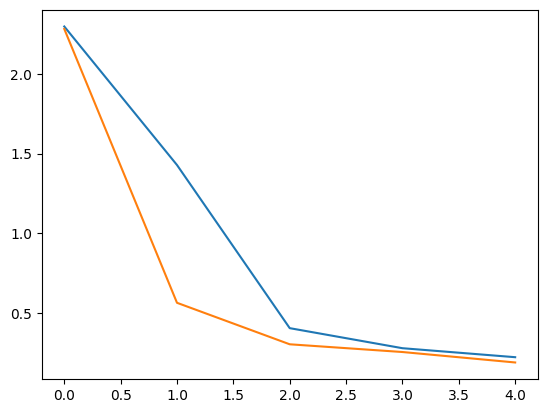

In [65]:
# 学習曲線
plt.plot(train_losses, label = 'train_losses')
plt.plot(val_losses, label = 'val_losses')